# Filtrado variables (redundancia)

Vamos a ver si hay colinearidad entre las variables para hacer un primer filtrado entre las variabeles

__Partimos de 41 variables que son de nutrientes__, habia mas pero se quitaron manualmente porque unas se extraian de otras, por ejemplo, en las grasas se daban las totales y tambien subdivididas por tipo de acido graso (monoinsaturadas, polisaturadas, etc)

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
metadatos = pd.read_csv("resultados_ana/metadatos_nutrientes.csv")

In [68]:
metadatos.head()

X.SampleID         KCAL        PROT       TFAT        CARB         MOIS  \
0  MCT.f.0001  1707.040193   95.668747  55.185318  187.965353  3848.605502   
1  MCT.f.0002  1970.043625  109.619765  53.615264  242.919015  3808.005721   
2  MCT.f.0003  1714.895330   89.992993  50.561373  234.225138  4183.622433   
3  MCT.f.0004  2487.232625   94.611953  92.021551  257.539030  4816.211548   
4  MCT.f.0005  2260.211176  110.268353  95.570253  165.608070  4404.243876   

        ALC     CAFF    THEO       SUGR  ...         LYCO           LZ  \
0  14.95872  331.520   0.000  84.468526  ...  4292.400000  1015.084700   
1  14.04000  378.880   0.000  74.208114  ...     0.000000   797.160625   
2   0.00000  378.880   9.472  67.474665  ...  2146.200000  2044.537500   
3  42.44800  379.430  20.240  83.960308  ...  5277.117000   659.294375   
4  43.93060  534.545  20.735  64.921966  ...  4070.199328  3726.710750   

        ATOC          VK       CHOLE       SFAT       MFAT       PFAT  \
0   5.709429   38.704504  193.148455  18.104675  22.043671   9.676532   
1   5.635238   49.068013  179.075500  18.429446  19.053080  10.773219   
2   5.586798   73.108225  150.879500  17.922190  17.790351  11.082590   
3  10.531568  264.002725  149.416500  20.909049  33.621689  32.220642   
4   8.144286  189.995874  366.883250  32.547474  32.895049  21.501892   

        VITD       CHOLN  
0   8.424643  374.445396  
1  23.931800  442.493000  
2   5.117800  352.901184  
3   9.486600  328.717550  
4   7.954950  414.724863  

[5 rows x 42 columns]

Tenemos la columna de los IDs que quitaremos para el analisis de las variables, la guardaremos para despues introducirla y guardar los datos filtrados

In [69]:
ID = metadatos["X.SampleID"]

In [70]:
metadatos.drop("X.SampleID",axis="columns",inplace=True)

In [71]:
metadatos.head()

KCAL        PROT       TFAT        CARB         MOIS       ALC  \
0  1707.040193   95.668747  55.185318  187.965353  3848.605502  14.95872   
1  1970.043625  109.619765  53.615264  242.919015  3808.005721  14.04000   
2  1714.895330   89.992993  50.561373  234.225138  4183.622433   0.00000   
3  2487.232625   94.611953  92.021551  257.539030  4816.211548  42.44800   
4  2260.211176  110.268353  95.570253  165.608070  4404.243876  43.93060   

      CAFF    THEO       SUGR       FIBE  ...         LYCO           LZ  \
0  331.520   0.000  84.468526  19.797250  ...  4292.400000  1015.084700   
1  378.880   0.000  74.208114  14.419375  ...     0.000000   797.160625   
2  378.880   9.472  67.474665  25.996125  ...  2146.200000  2044.537500   
3  379.430  20.240  83.960308  26.178425  ...  5277.117000   659.294375   
4  534.545  20.735  64.921966  13.011350  ...  4070.199328  3726.710750   

        ATOC          VK       CHOLE       SFAT       MFAT       PFAT  \
0   5.709429   38.704504  193.148455  18.104675  22.043671   9.676532   
1   5.635238   49.068013  179.075500  18.429446  19.053080  10.773219   
2   5.586798   73.108225  150.879500  17.922190  17.790351  11.082590   
3  10.531568  264.002725  149.416500  20.909049  33.621689  32.220642   
4   8.144286  189.995874  366.883250  32.547474  32.895049  21.501892   

        VITD       CHOLN  
0   8.424643  374.445396  
1  23.931800  442.493000  
2   5.117800  352.901184  
3   9.486600  328.717550  
4   7.954950  414.724863  

[5 rows x 41 columns]

In [30]:
metadatos.columns

Index(['KCAL', 'PROT', 'TFAT', 'CARB', 'MOIS', 'ALC', 'CAFF', 'THEO', 'SUGR',
       'FIBE', 'CALC', 'IRON', 'MAGN', 'PHOS', 'POTA', 'SODI', 'ZINC', 'COPP',
       'SELE', 'VC', 'VB1', 'VB2', 'NIAC', 'VB6', 'FOLA', 'VB12', 'VARA',
       'RET', 'BCAR', 'ACAR', 'CRYP', 'LYCO', 'LZ', 'ATOC', 'VK', 'CHOLE',
       'SFAT', 'MFAT', 'PFAT', 'VITD', 'CHOLN'],
      dtype='object')

-----------------------------------------------

__Lo primero que vamos a hacer es quitar las columnas SFAT, MFAT y PFAT__ porque no me di cuenta de que las podiamos quitar ya que su valor esta reflejado en __TFAT__ --> de esta manera partimos de 38 columnas (variables)

In [72]:
columnas_quitar = ["SFAT","MFAT","PFAT"]
metadatos = metadatos.drop(columnas_quitar,axis="columns")

In [73]:
metadatos.head()

KCAL        PROT       TFAT        CARB         MOIS       ALC  \
0  1707.040193   95.668747  55.185318  187.965353  3848.605502  14.95872   
1  1970.043625  109.619765  53.615264  242.919015  3808.005721  14.04000   
2  1714.895330   89.992993  50.561373  234.225138  4183.622433   0.00000   
3  2487.232625   94.611953  92.021551  257.539030  4816.211548  42.44800   
4  2260.211176  110.268353  95.570253  165.608070  4404.243876  43.93060   

      CAFF    THEO       SUGR       FIBE  ...         BCAR         ACAR  \
0  331.520   0.000  84.468526  19.797250  ...  2439.289735  1035.010000   
1  378.880   0.000  74.208114  14.419375  ...   964.080625   122.289375   
2  378.880   9.472  67.474665  25.996125  ...  4678.933750  1869.230000   
3  379.430  20.240  83.960308  26.178425  ...  1394.967000   310.762500   
4  534.545  20.735  64.921966  13.011350  ...  2515.552603    61.490000   

         CRYP         LYCO           LZ       ATOC          VK       CHOLE  \
0  666.655000  4292.400000  1015.084700   5.709429   38.704504  193.148455   
1  376.401875     0.000000   797.160625   5.635238   49.068013  179.075500   
2  360.557500  2146.200000  2044.537500   5.586798   73.108225  150.879500   
3   90.231500  5277.117000   659.294375  10.531568  264.002725  149.416500   
4   15.886010  4070.199328  3726.710750   8.144286  189.995874  366.883250   

        VITD       CHOLN  
0   8.424643  374.445396  
1  23.931800  442.493000  
2   5.117800  352.901184  
3   9.486600  328.717550  
4   7.954950  414.724863  

[5 rows x 38 columns]

Vamos a crear una matriz con las correlaicones entre todas las variables para echar un primer vistazo sobre como de relacionadas estan las variables

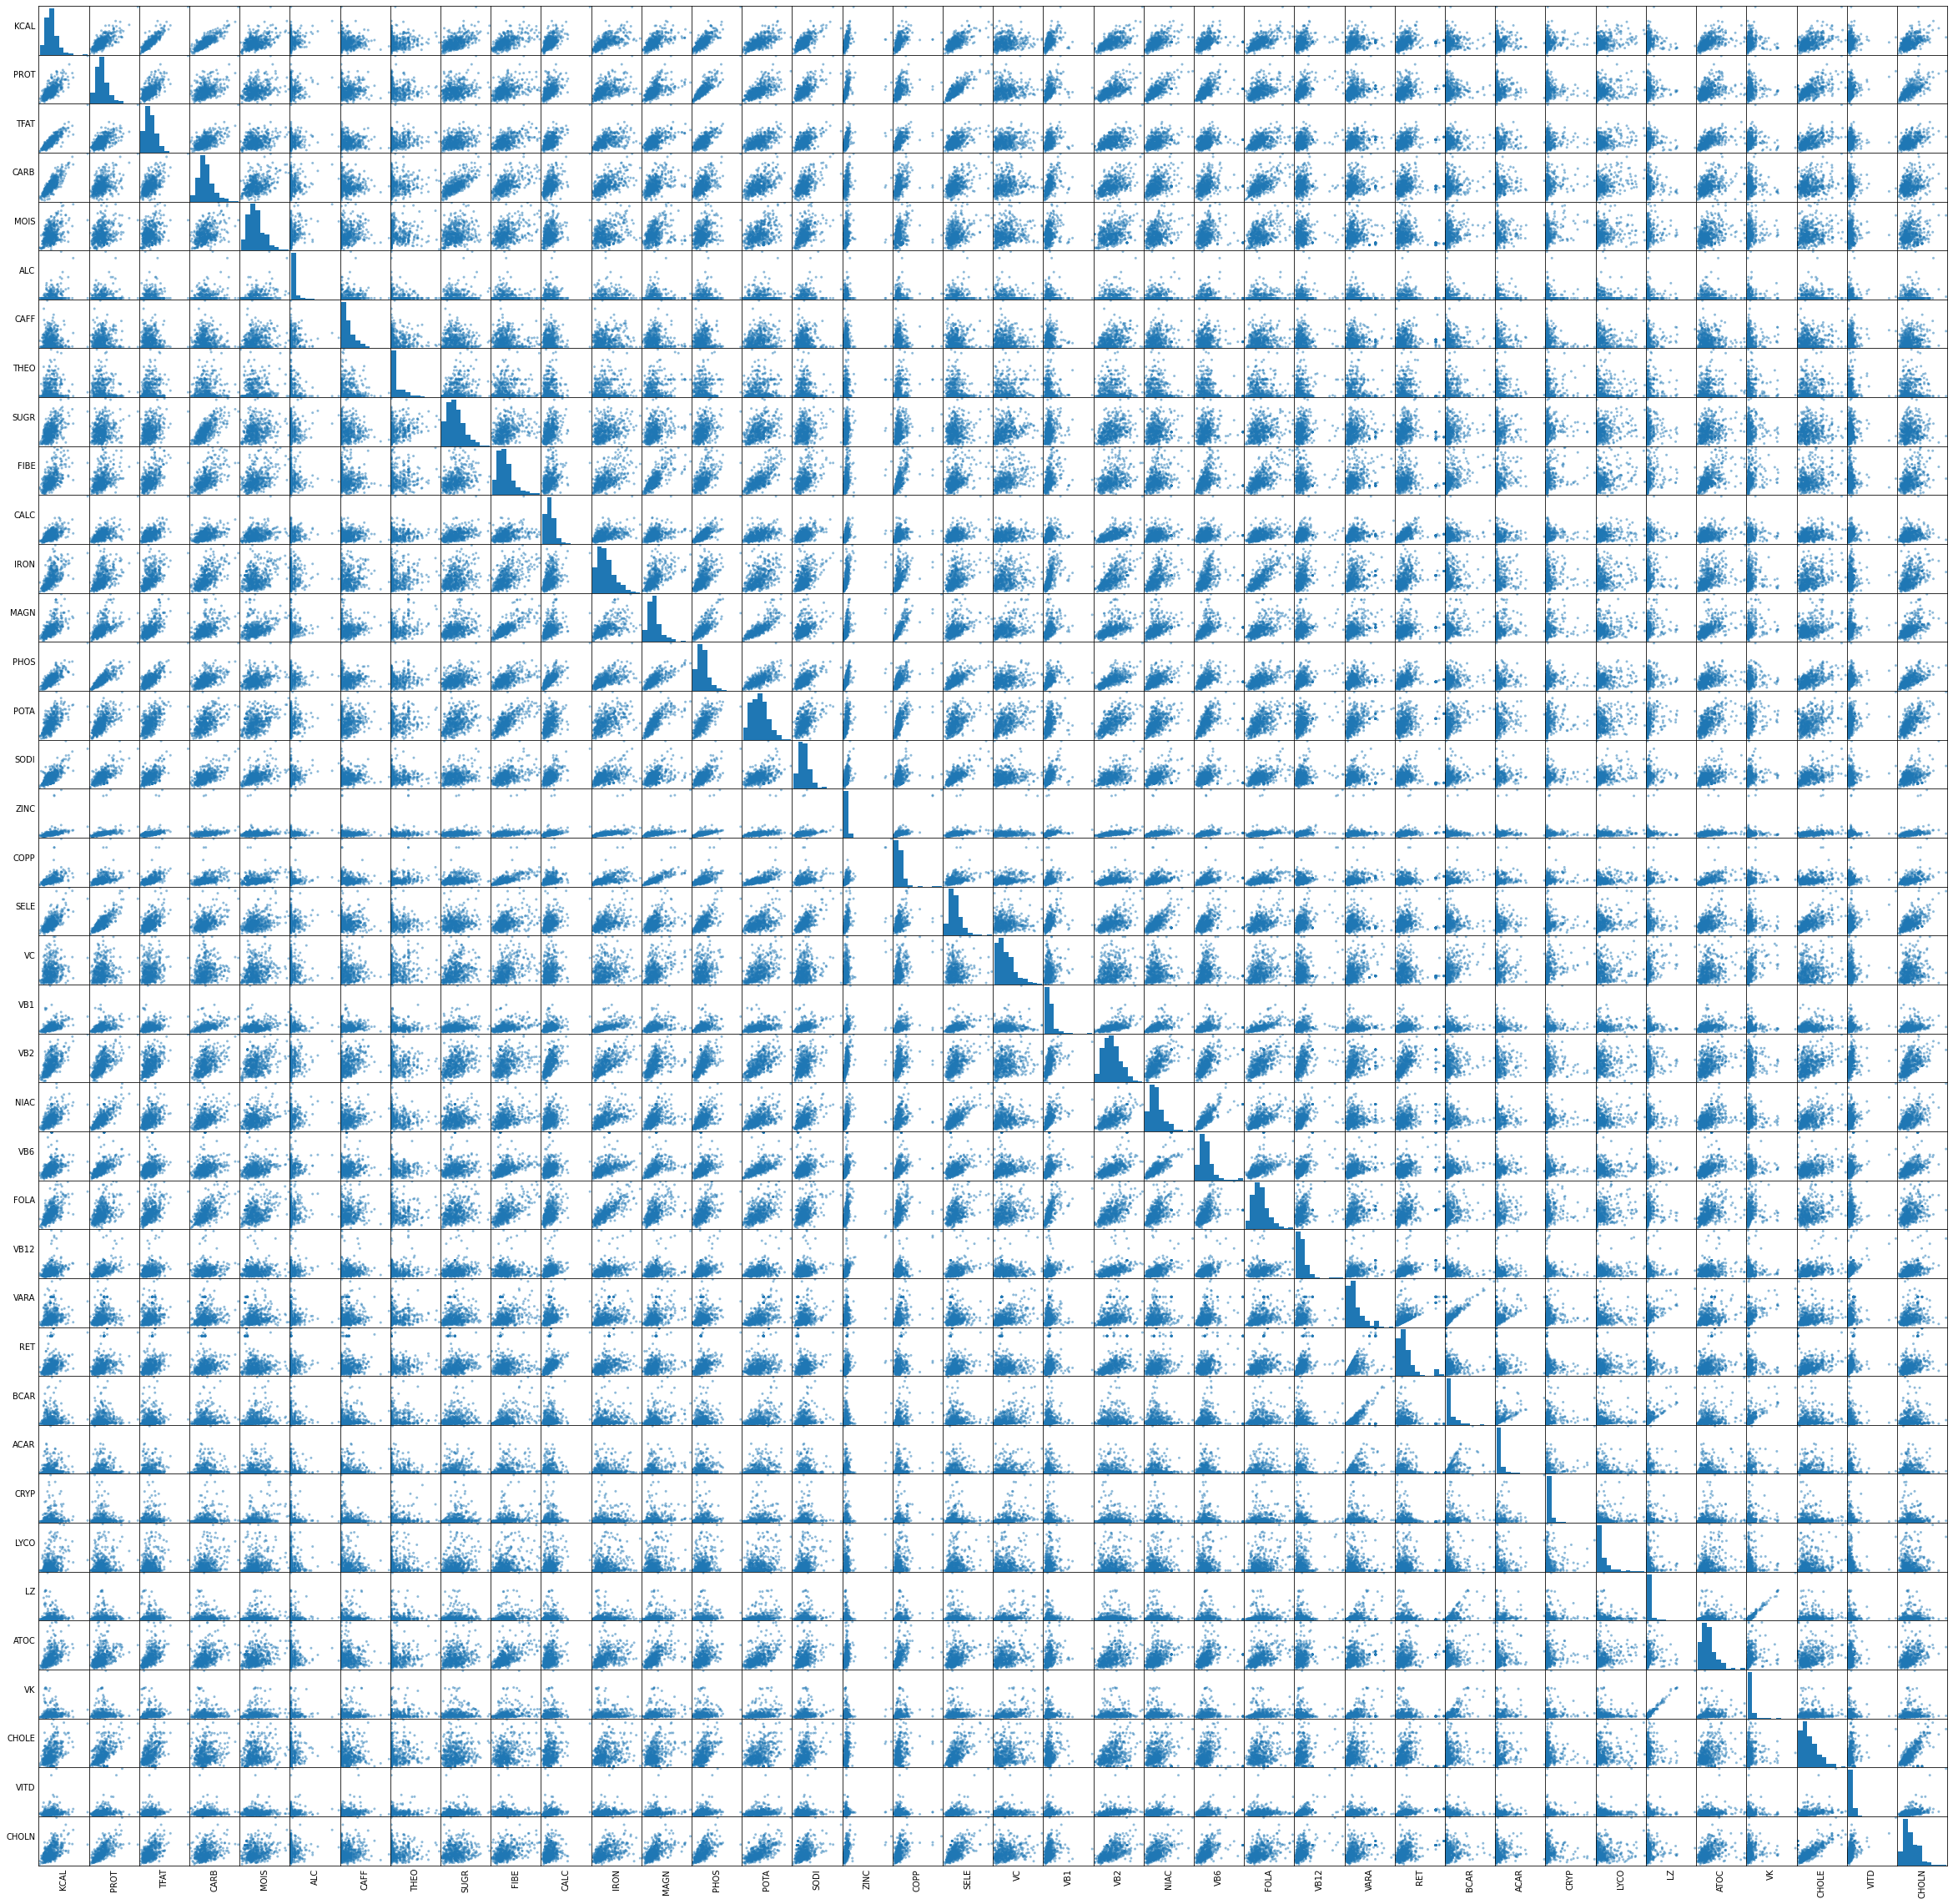

In [74]:
axs = pd.plotting.scatter_matrix(metadatos, figsize=(41, 41))
n = len(metadatos.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

como no podemos ver mucho en este grafico, lo que hacemos es un heatmap de las correlaciones de las variables y tambien guardamos en una tabla los valores que se van a representar en ese heatmap para posterior uso

In [75]:
tabla_correlaciones = metadatos.corr()
tabla_correlaciones.head()

KCAL      PROT      TFAT      CARB      MOIS       ALC      CAFF  \
KCAL  1.000000  0.734892  0.880715  0.837793  0.426896  0.299487 -0.040285   
PROT  0.734892  1.000000  0.647408  0.427503  0.279659  0.113692  0.053091   
TFAT  0.880715  0.647408  1.000000  0.577260  0.283872  0.066102 -0.098970   
CARB  0.837793  0.427503  0.577260  1.000000  0.411244  0.168906 -0.045816   
MOIS  0.426896  0.279659  0.283872  0.411244  1.000000  0.303431  0.154798   

          THEO      SUGR      FIBE  ...      BCAR      ACAR      CRYP  \
KCAL  0.079372  0.537553  0.576020  ...  0.054055  0.041818  0.093932   
PROT -0.053588  0.200203  0.393834  ...  0.045229  0.016839 -0.039736   
TFAT  0.139353  0.335876  0.513806  ...  0.055722  0.034547  0.067570   
CARB  0.103749  0.723841  0.598448  ...  0.080430  0.069830  0.188783   
MOIS  0.013067  0.246324  0.426088  ...  0.196119  0.120572  0.317349   

          LYCO        LZ      ATOC        VK     CHOLE      VITD     CHOLN  
KCAL  0.283579 -0.008199  0.500988  0.020702  0.453027  0.132769  0.518848  
PROT  0.136068  0.067782  0.358443  0.083171  0.556176  0.307044  0.688427  
TFAT  0.221877 -0.008814  0.569307  0.033345  0.480347  0.107608  0.515511  
CARB  0.330847 -0.022418  0.378049 -0.011750  0.182814  0.023628  0.252966  
MOIS  0.174392  0.138983  0.252000  0.146354  0.203299  0.062794  0.173348  

[5 rows x 38 columns]

<AxesSubplot:>

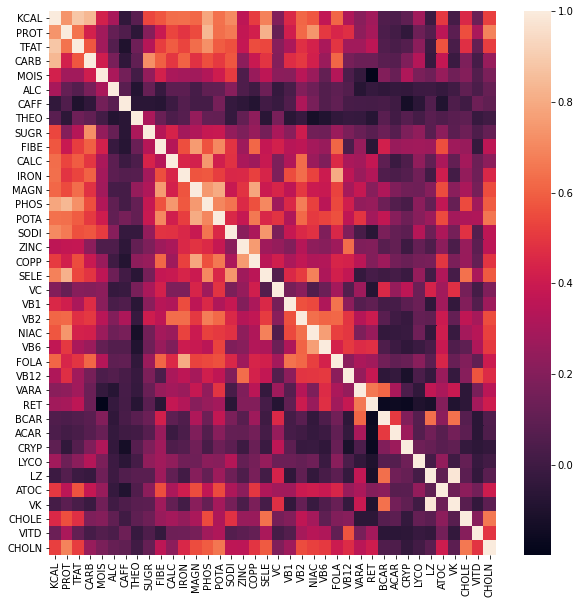

In [76]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(metadatos.corr(),xticklabels=True, yticklabels=True)

In [77]:
#Vamos a ver con cuantas variables esta relacionada por mas de 0.5 cada variable
for columna in tabla_correlaciones.columns:
    print(str(columna)+": "+str(tabla_correlaciones[tabla_correlaciones[columna]>0.5].shape[0]-1))

KCAL: 18
PROT: 13
TFAT: 14
CARB: 10
MOIS: 1
ALC: 0
CAFF: 0
THEO: 0
SUGR: 2
FIBE: 10
CALC: 5
IRON: 12
MAGN: 12
PHOS: 17
POTA: 15
SODI: 7
ZINC: 2
COPP: 8
SELE: 9
VC: 0
VB1: 4
VB2: 14
NIAC: 11
VB6: 6
FOLA: 10
VB12: 3
VARA: 2
RET: 1
BCAR: 4
ACAR: 1
CRYP: 0
LYCO: 0
LZ: 2
ATOC: 5
VK: 2
CHOLE: 4
VITD: 1
CHOLN: 11


Podemos quedarnos con __alc, caff, theo, mois (relacionada con sodio 0.51), vc, cryp, lyco y vitd (relacionado con VB12 0.57)__ directamente ya que tienen mas de 0.5 de relacion con ninguna variable o con 1 de manera muy cercana a 0.5 (como mois)

Habra que quitar __KCAL__ porque esta ligada fuertemente con todas las demas

Vamos a quitar todas estas variables y ver la tabla de correlaciones, la cual sera algo mas pequeña y sera mas facil ver que pasa

------------------------------------

In [78]:
columnas_quitar = ["KCAL"]
metadatos_relacionados = metadatos.drop(columnas_quitar,axis="columns")

<AxesSubplot:>

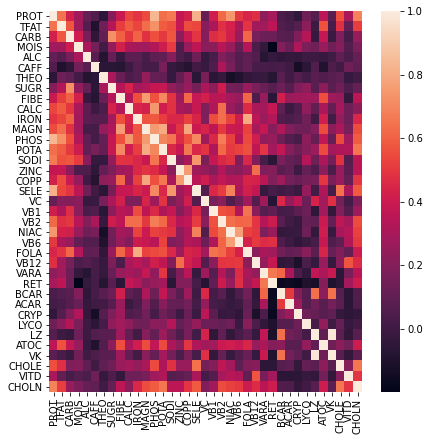

In [79]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(metadatos_relacionados.corr(),xticklabels=True, yticklabels=True)

Podemos ver que hay algunas variables que estan relaciondas de baja manera o de ninguna manera con muchas de las variables en el heatmap (como LZ y ACAR), sin embargo, vamos a asegurarnos variando el treshold de correlacion y descartando las variables que mas esten correlacionadas (solo 1) hasta intentar quedarnos sin variables redundantes

------------------------------------

__Valores >0.9__

In [80]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.9].shape[0]-1))

PROT: 0
TFAT: 0
CARB: 0
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 0
FIBE: 0
CALC: 0
IRON: 0
MAGN: 0
PHOS: 0
POTA: 0
SODI: 0
ZINC: 0
COPP: 0
SELE: 0
VC: 0
VB1: 0
VB2: 0
NIAC: 0
VB6: 0
FOLA: 0
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
LZ: 1
ATOC: 0
VK: 1
CHOLE: 0
VITD: 0
CHOLN: 0


Con mas de 0.9 solo tenemos correlacionados LZ (Lutein + zeaxanthin, ambos pigmentos) y VK (Vitamin K, vitamina relacionada con la coagulacion de la sangre)

__Quitaremos LZ dejando la vitamina K.__

In [81]:
metadatos_relacionados = metadatos_relacionados.drop("LZ",axis="columns")

In [82]:
len(metadatos_relacionados.columns)

36

----------------------------

__Valores >0.8__

In [83]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.8].shape[0]-1))

PROT: 2
TFAT: 0
CARB: 0
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 0
FIBE: 0
CALC: 0
IRON: 0
MAGN: 1
PHOS: 1
POTA: 1
SODI: 0
ZINC: 0
COPP: 0
SELE: 1
VC: 0
VB1: 0
VB2: 0
NIAC: 0
VB6: 0
FOLA: 0
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 0
CHOLE: 0
VITD: 0
CHOLN: 0


Tenemos 5 variables con una relacion mayor a 0.8 con otras variables:
 - PROT (2): PHOS (0.83), SELE (0.82)
 - MAGN (1): POTA (0.8)
 - PHOS (1): PROT (0.83)
 - POTA (1): MAGN (0.8)
 - SELE (1): PROT (0.82)

De estos los que se quitaran son PHOS y SELE.
Sin embargo, al ser el magnesio y el potasio nutrientes importantes para los microorganismos (moo), los conservaremos

In [84]:
metadatos_relacionados = metadatos_relacionados.drop(["PHOS","SELE"],axis="columns")
len(metadatos_relacionados.columns)

34

-------------------------

__Valores >0.7__

In [85]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.7].shape[0]-1))

PROT: 1
TFAT: 0
CARB: 1
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 1
FIBE: 2
CALC: 0
IRON: 1
MAGN: 3
POTA: 2
SODI: 0
ZINC: 1
COPP: 2
VC: 0
VB1: 0
VB2: 0
NIAC: 2
VB6: 1
FOLA: 1
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 0
CHOLE: 0
VITD: 0
CHOLN: 0


Tenemos 12 variables con una relacion mayor a 0.7 con otras variables:
 - PROT (1): NIAC(0.73)
 - CARB (1): SUGR(0.72)
 - SUGR (1): CARB(0.72)
 - FIBE (2): MAGN (0.75), POTA (0.7)
 - IRON (1): FOLA (0.79)
 - MAGN (3): POTA (0.8), FIBE (0.75), COPP (0.78)
 - POTA (2): MAGN (0.8), FIBE (0.7)
 - ZINC (1): COPP (0.75)
 - COPP (2): ZINC (0.75), MAGN (0.78)
 - NIAC (2): PROT(0.73), VB6 (0.76) -
 - VB6 (1): NIAC (0.76)
 - FOLA (1): IRON (0.79) - 

__Quitaremos NIAC, FOLA, FIBE y COPP.__

Dejamos POTA y MAGN por las mismas razones que en el anterior filtrado (>0.8) y dejaremos CARB porque es un macronutriente

In [86]:
metadatos_relacionados = metadatos_relacionados.drop(["NIAC","FOLA","FIBE","COPP","SUGR"],axis="columns")
len(metadatos_relacionados.columns)

29

---------------

__Valores >0.6__

In [87]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.6].shape[0]-1))

PROT: 5
TFAT: 2
CARB: 1
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
CALC: 1
IRON: 2
MAGN: 2
POTA: 4
SODI: 1
ZINC: 1
VC: 0
VB1: 0
VB2: 5
VB6: 1
VB12: 1
VARA: 2
RET: 1
BCAR: 2
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 1
CHOLE: 1
VITD: 0
CHOLN: 3


Hay 18 variables que tienen al menos una relacion con otra variable, vamos a ver si podemos quitar algunas de ellas:
 - PROT (5): TFAT, POTA, SODI, VB2 y CHOLN
 - TFAT (2): PROT y MAGN
 - CARB (1): IRON
 - CALC (1): VB2
 - IRON (1): CARB
 - MAGN (2): TFAT y POTA
 - POTA (4): PROT, MAGN, VB2, CHOLN
 - SODI (1): PROT
 - ZINC (1): VB12
 - VB2 (5): PROT, CALC, IRON, POTA, VB6
 - VB6 (1): VB2
 - VB12 (1): ZINC
 - VARA (2): RET, BCAR
 - RET (1): VARA
 - BCAR (2): VARA, VK
 - VK (1): BCAR 
 - CHOLE (1): CHOLN
 - CHOLN (3): PROT, POTA, CHOLE

De todas estas nos quedaremos con las columnas PROT, TFAT, CARB, CALC, MAGN, POTA y ZINC por ser importantes para los microorganismos.

Quitaremos IRON, VB2, CHOLN, BCAR, RET, VB12 y SODI

In [88]:
metadatos_relacionados = metadatos_relacionados.drop(["IRON", "VB2", "CHOLN", "BCAR", "RET", "VB12", "SODI"],axis="columns")
len(metadatos_relacionados.columns)

22

------------------

__Valores >0.5__

In [89]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.5].shape[0]-1))

PROT: 6
TFAT: 6
CARB: 2
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
CALC: 2
MAGN: 4
POTA: 6
ZINC: 0
VC: 0
VB1: 0
VB6: 2
VARA: 0
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 3
VK: 0
CHOLE: 1
VITD: 0


Son 11 las variabels que estan relacionadas con otras, pero nos quedaremos con lo que tenemos ya que hemos conseguido bajar hasta 22 variables, casi la mitad de nuestras variables iniciales

------------------

Ahora que ya tenemos las variables que tenemos vamos a insertar de nuevo los datos de los IDs de las muestras

In [91]:
metadatos_relacionados.insert(0, "X.SampleID", list(ID))

In [92]:
metadatos_relacionados.head()

X.SampleID        PROT       TFAT        CARB         MOIS       ALC  \
0  MCT.f.0001   95.668747  55.185318  187.965353  3848.605502  14.95872   
1  MCT.f.0002  109.619765  53.615264  242.919015  3808.005721  14.04000   
2  MCT.f.0003   89.992993  50.561373  234.225138  4183.622433   0.00000   
3  MCT.f.0004   94.611953  92.021551  257.539030  4816.211548  42.44800   
4  MCT.f.0005  110.268353  95.570253  165.608070  4404.243876  43.93060   

      CAFF    THEO         CALC        MAGN  ...       VB1       VB6  \
0  331.520   0.000  1428.713791  361.382388  ...  2.633348  2.513335   
1  378.880   0.000  1650.363000  383.633000  ...  2.040037  2.704198   
2  378.880   9.472  1382.725500  375.287250  ...  1.969163  1.956890   
3  379.430  20.240  1879.623250  399.610875  ...  2.444660  2.903442   
4  534.545  20.735  1540.939814  380.967325  ...  1.948602  2.852890   

         VARA         ACAR        CRYP         LYCO       ATOC          VK  \
0  654.466815  1035.010000  666.655000  4292.400000   5.709429   38.704504   
1  607.290375   122.289375  376.401875     0.000000   5.635238   49.068013   
2  765.785500  1869.230000  360.557500  2146.200000   5.586798   73.108225   
3  608.261500   310.762500   90.231500  5277.117000  10.531568  264.002725   
4  864.762510    61.490000   15.886010  4070.199328   8.144286  189.995874   

        CHOLE       VITD  
0  193.148455   8.424643  
1  179.075500  23.931800  
2  150.879500   5.117800  
3  149.416500   9.486600  
4  366.883250   7.954950  

[5 rows x 23 columns]

In [93]:
metadatos_relacionados.to_csv("resultados_ana/metadatos_nutrientes_filtrados_22.csv",index=False)